In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
X, y = mnist['data'], mnist['target']
print("Data shape",X.shape)
print("Target shape",y.shape)

Data shape (70000, 784)
Target shape (70000,)


<function matplotlib.pyplot.show(close=None, block=None)>

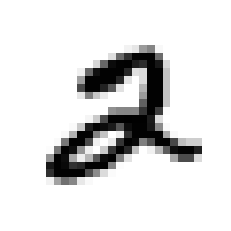

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit = X.iloc[[5]]
some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis('off')
plt.show

In [42]:
y[0]

'5'

In [43]:
y = y.astype(np.uint8)

In [44]:
y[0]

5

In [45]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [48]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [51]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf = sgd_clf.fit(X_train, y_train_5)

In [67]:
sgd_clf.predict(X.iloc[[0]])
X_train.iloc[[1,2,3]]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index)
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

[19964 19965 19966 ... 59997 59998 59999]
0.95035
[    0     1     2 ... 59997 59998 59999]
0.96035
[    0     1     2 ... 40088 40125 40127]
0.9604


In [68]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [69]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit (self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [70]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [71]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [76]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [77]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [78]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311